# Hackathon : Reinforcement Learning for Drone Navigation

- Team name: Olympus Coders
- Team members names: Loan SAMAI, Farès BENAGGOUNE, Marc Estassy BATABA

## 0. Prerequisites

In [67]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [69]:
trained_agent, all_rewards = simulate.train('./eval_configs/config_10.json')

AttributeError: module 'simulate' has no attribute 'train'

In [66]:
trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json", "train_configs/config_3.json", "train_configs/config_7.json"])



🚀 Début de l'entraînement multi-configurations 🚀

Épisode 1/1000, Reward: 3879.10
Épisode 2/1000, Reward: 3880.30
Épisode 3/1000, Reward: -400.00
Épisode 4/1000, Reward: -400.00
Épisode 5/1000, Reward: -400.00
Épisode 6/1000, Reward: 2717.30
Épisode 7/1000, Reward: -400.00
Épisode 8/1000, Reward: 652.80
Épisode 9/1000, Reward: 638.70
Épisode 10/1000, Reward: -400.00
Épisode 11/1000, Reward: -400.00
Épisode 12/1000, Reward: -400.00
Épisode 13/1000, Reward: -400.00
Épisode 14/1000, Reward: 1639.90
Épisode 15/1000, Reward: 2667.60
Épisode 16/1000, Reward: 2763.90
Épisode 17/1000, Reward: -400.00
Épisode 18/1000, Reward: 3818.20
Épisode 19/1000, Reward: 3866.30
Épisode 20/1000, Reward: -400.00
Épisode 21/1000, Reward: -400.00
Épisode 22/1000, Reward: -400.00
Épisode 23/1000, Reward: 2629.10
Épisode 24/1000, Reward: 3759.40
Épisode 25/1000, Reward: 3953.90
Épisode 26/1000, Reward: -400.00
Épisode 27/1000, Reward: 640.10
Épisode 28/1000, Reward: -400.00
Épisode 29/1000, Reward: -400.00
Épis

In [ ]:
trained_agent, all_rewards = simulate.train('./config.json',  max_episodes_override=300, checkpoint_path="my_full_checkpoint.pth", save_interval=50)

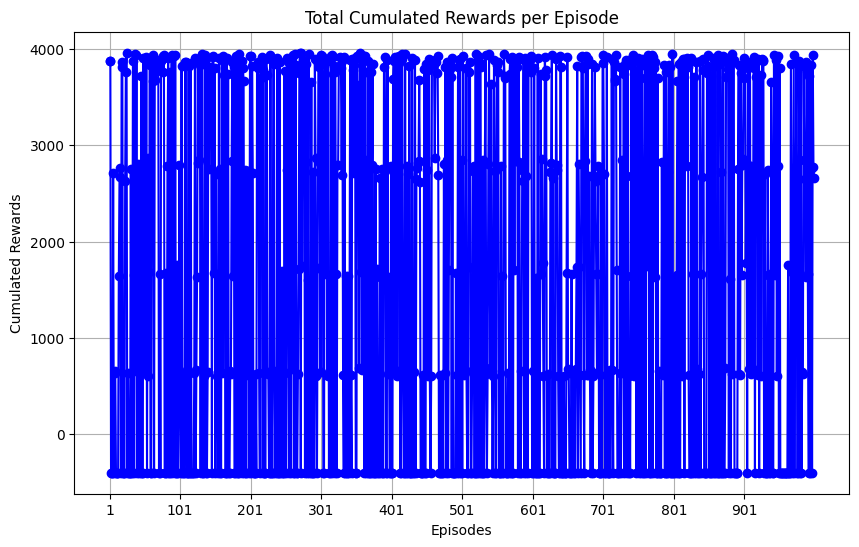

In [70]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [71]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [72]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---

--- Evaluating Configuration: ./eval_configs/config_2.json ---

--- Evaluating Configuration: ./eval_configs/config_3.json ---

--- Evaluating Configuration: ./eval_configs/config_4.json ---

--- Evaluating Configuration: ./eval_configs/config_5.json ---

--- Evaluating Configuration: ./eval_configs/config_6.json ---

--- Evaluating Configuration: ./eval_configs/config_7.json ---

--- Evaluating Configuration: ./eval_configs/config_8.json ---

--- Evaluating Configuration: ./eval_configs/config_9.json ---

--- Evaluating Configuration: ./eval_configs/config_10.json ---


In [73]:
display(all_results)

,config_path,episode,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,1,-400.0,0,0
1,./eval_configs/config_1.json,2,-400.0,0,0
2,./eval_configs/config_1.json,3,-400.0,0,0
3,./eval_configs/config_1.json,4,-400.0,0,0
4,./eval_configs/config_1.json,5,-400.0,0,0
...,...,...,...,...,...
95,./eval_configs/config_10.json,6,-400.0,0,0
96,./eval_configs/config_10.json,7,-400.0,0,0
97,./eval_configs/config_10.json,8,-400.0,0,0
98,./eval_configs/config_10.json,9,-400.0,0,0


In [74]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)

,config_path,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,-400.0,0.0,0.0
1,./eval_configs/config_10.json,-400.0,0.0,0.0
2,./eval_configs/config_2.json,-400.0,0.0,0.0
3,./eval_configs/config_3.json,-400.0,0.0,0.0
4,./eval_configs/config_4.json,-400.0,0.0,0.0
5,./eval_configs/config_5.json,-400.0,0.0,0.0
6,./eval_configs/config_6.json,-400.0,0.0,0.0
7,./eval_configs/config_7.json,-400.0,0.0,0.0
8,./eval_configs/config_8.json,-400.0,0.0,0.0
9,./eval_configs/config_9.json,-400.0,0.0,0.0
